In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np 

%reload_ext autoreload
%aimport fluid_flow
from fluid_flow import produce_final_data, compute_UVP
from pathlib import Path

In [2]:
compute_UVP(30);

In [5]:
#%autoreload 1
N_list = np.array([30,50,70,100,130, 160, 200,250])
#N_list = np.array([30, 50, 70])

if False:
    chrono = produce_final_data(N_list)
    
    from pathlib import Path
    p = Path('data/vel_field/test_perfo') / 'UVP_CPU_time_test.npy'
    np.save(p, [N_list, chrono])

working on 30
working on 50
working on 70
working on 100
working on 130
working on 160
working on 200
working on 250


In [39]:
T_tot = []
def plot_perfos(ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(4,3))
    ps = [Path('data/vel_field') / 'UVP_CPU_time{}.npy'.format(s) for s in ['', '_2']]
    ps.append(Path('data/vel_field/test_perfo') / 'UVP_CPU_time_test.npy')
    for p in ps:
        N_list, chrono = np.load(p)
        
        T_tot.append(chrono.sum())

        l, = ax.plot(N_list, chrono, 'o')
        ax.set_xscale('log')
        ax.set_yscale('log')
        from scipy.optimize import curve_fit
        def lin(x, a, b): return a*x + b 
        popt, pcov = curve_fit(lin, np.log(N_list), np.log(chrono))
        a,b = popt
        yopt = np.exp(b)*(N_list)**a
        if False:
            ax.text(0.9, 0.2, '$\delta \propto N^{' + '{:.2f}'.format(a) + '}$', 
                    transform=ax.transAxes, horizontalalignment='right', verticalalignment='bottom',
                    fontsize='x-large')
        s = '$\propto N^{' + '{:.2f}'.format(a) + '}$'
        s += ', {:.0f} min'.format(chrono.sum() / 60)
        ax.plot(N_list, yopt, label=s, color=l.get_color())
        
        #ax.annotate('{:.1f} min'.format(chrono.sum() / 60), (200 , 10)  , horizontalalignment='right', verticalalignment='top',
        #       color=l.get_color())
    ax.set_xlabel('$N$')
    ax.set_ylabel('CPU time [s]')
    ax.legend(handlelength=0.5, title='scaling, total time:', loc='upper left')
    plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
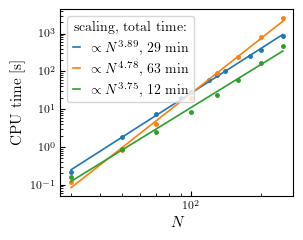

In [40]:
from plotting import set_size
plt.style.use('tex.mplstyle')
figsize = set_size(fraction=.5, aspect_r=0.4)
fig, ax = plt.subplots(figsize=figsize)
plot_perfos(ax)

In [41]:
fig.savefig('figures/perfo_CPUtime_fluid.svg')